In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"eyadeldokany","key":"24e86ed4c6a4e369b289347c1c2f0501"}'}

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d konikarani/autismdiagnosis

Dataset URL: https://www.kaggle.com/datasets/konikarani/autismdiagnosis
License(s): unknown


In [21]:
!unzip /content/autismdiagnosis.zip

Archive:  /content/autismdiagnosis.zip
  inflating: Autism_Prediction/sample_submission.csv  
  inflating: Autism_Prediction/test.csv  
  inflating: Autism_Prediction/train.csv  


In [22]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
train_data = pd.read_csv('/content/Autism_Prediction/train.csv')
test_data = pd.read_csv('/content/Autism_Prediction/test.csv')

In [24]:
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [25]:
train_data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [27]:
train_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [28]:
train_data.drop('ID', axis=1, inplace=True)

In [29]:
train_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [30]:
# train_data.replace('?', np.mean, inplace=True)

In [31]:
train_data.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [32]:
train_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [35]:
le = LabelEncoder()

In [36]:
train_data['ethnicity'] = le.fit_transform(train_data['ethnicity'])
train_data['relation'] = le.fit_transform(train_data['relation'])
train_data['age_desc'] = le.fit_transform(train_data['age_desc'])
train_data['jaundice'] = le.fit_transform(train_data['jaundice'])
train_data['austim'] = le.fit_transform(train_data['austim'])
train_data['Class/ASD'] = le.fit_transform(train_data['Class/ASD'])
train_data['gender'] = le.fit_transform(train_data['gender'])
train_data['contry_of_res'] = le.fit_transform(train_data['contry_of_res'])
train_data['used_app_before'] = le.fit_transform(train_data['used_app_before'])

In [37]:
train_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,...,0,0,0,0,7,0,6.351166,0,5,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,25,0,2.255185,0,5,0
2,1,1,1,1,1,1,1,1,1,1,...,1,10,0,1,54,0,14.851484,0,5,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,54,0,2.276617,0,5,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,46,0,-4.777286,0,5,0


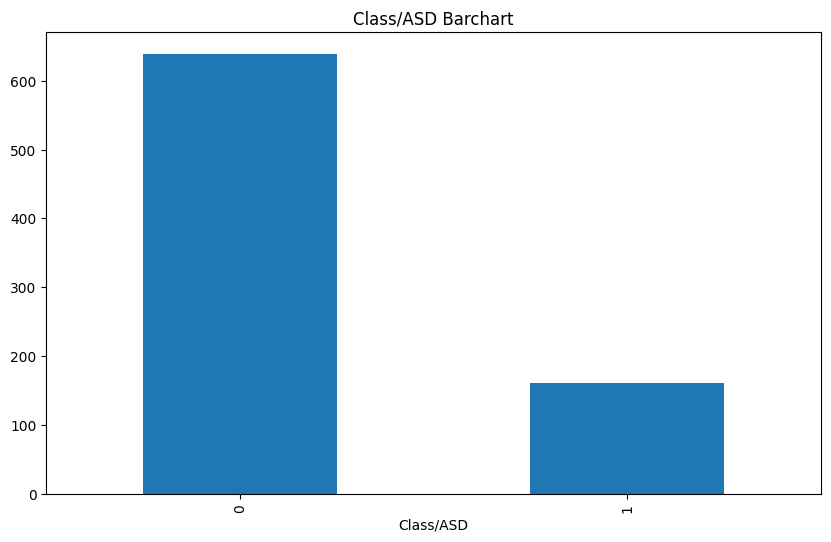

In [38]:
plt.figure(figsize=(10, 6))
train_data['Class/ASD'].value_counts().plot(kind='bar')
plt.title('Class/ASD Barchart')
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = train_data.drop('Class/ASD', axis=1)
y = train_data['Class/ASD']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_train_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_train_data['Class/ASD'] = y_resampled



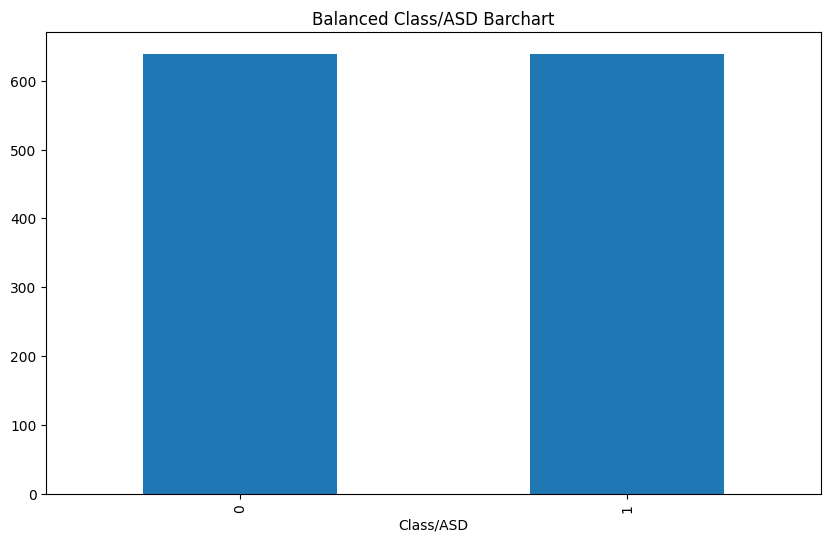

In [40]:
# Plot the balanced class distribution
plt.figure(figsize=(10, 6))
balanced_train_data['Class/ASD'].value_counts().plot(kind='bar')
plt.title('Balanced Class/ASD Barchart')
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# Drop ID column
train_df = train_data

# Encode categorical features
categorical_cols = ["gender", "jaundice", "austim", "contry_of_res", "used_app_before", "age_desc"]
label_encoders = {}

# train_data.drop('ethnicity' , axis=1, inplace=True)
# train_data.drop('relation',axis=1,inplace=True)

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Define features and target
X = train_df.drop(columns=["Class/ASD"])
y = train_df["Class/ASD"]

# Normalize numerical features
scaler = StandardScaler()
X[["age", "result"]] = scaler.fit_transform(X[["age", "result"]])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.77      0.62      0.69        32

    accuracy                           0.89       160
   macro avg       0.84      0.79      0.81       160
weighted avg       0.88      0.89      0.88       160



In [48]:
# AQ-10 Questions Mapping
aq10_questions = {
    "A1_Score": "Does the person notice small sounds that others do not?",
    "A2_Score": "Does the person concentrate on details rather than the whole picture?",
    "A3_Score": "Does the person find it easy to do more than one thing at once? (Reverse scored)",
    "A4_Score": "Does the person find it difficult to switch back and forth between activities?",
    "A5_Score": "Does the person find social situations difficult?",
    "A6_Score": "Does the person find it easy to 'small talk' with people? (Reverse scored)",
    "A7_Score": "Does the person find it difficult to understand others' emotions?",
    "A8_Score": "Does the person find it difficult to make eye contact with others?",
    "A9_Score": "Does the person notice patterns in things more easily than others?",
    "A10_Score": "Does the person find it easy to imagine being someone else? (Reverse scored)"
}

# Function to take user input and evaluate

def evaluate_input():
    print("Enter the following details:")
    user_data = {}

    for col in X.columns:
        if col in aq10_questions:
            value = input(f"{aq10_questions[col]} (Yes=1, No=0): ")
            user_data[col] = int(value)
        elif col in label_encoders:
            value = input(f"{col} (choose from {list(label_encoders[col].classes_)}): ")
            user_data[col] = label_encoders[col].transform([value])[0]
        else:
            value = float(input(f"{col}: "))
            if col in ["age", "result"]:
                user_data[col] = scaler.transform([[value, 0]])[0][0]  # Ensure correct shape
            else:
                user_data[col] = value

    user_df = pd.DataFrame([user_data])
    prediction = model.predict(user_df)[0]
    print("Predicted Autism Status:", "Autism" if prediction == 1 else "No Autism")

# Run evaluation function
evaluate_input()


Enter the following details:


KeyboardInterrupt: Interrupted by user